In [240]:
!pip install lifelines
!pip install pycox
!pip install xgbse
!pip install optuna
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [241]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, ElasticNetCV
import os

In [242]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [243]:
datapath = '/content/drive/My Drive/Colab Notebooks/2022_UTUC_surv/data'
## data
data = pd.read_csv(os.path.join(datapath+'/'+'UTUC_deep.csv'))

savepath = '/content/drive/My Drive/Colab Notebooks/2022_UTUC_surv/save/'


In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               773 non-null    int64  
 1   NAC              773 non-null    int64  
 2   Pre_WBC          773 non-null    object 
 3   Pre_Neu          773 non-null    object 
 4   Pre_Lym          773 non-null    object 
 5   Pre_Plt          773 non-null    object 
 6   Pre_Hb           773 non-null    object 
 7   Pre_Crp          773 non-null    object 
 8   Pre_alb          773 non-null    object 
 9   Pre_cr           773 non-null    object 
 10  Pre_GFR          773 non-null    object 
 11  Pre_CO           773 non-null    object 
 12  Age              773 non-null    int64  
 13  Female           773 non-null    int64  
 14  BMI              773 non-null    float64
 15  DM               773 non-null    int64  
 16  HTN              773 non-null    int64  
 17  Location_Pelvis 

In [245]:
data.columns

Index(['ID', 'NAC', 'Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb',
       'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female',
       'BMI', 'DM', 'HTN', 'Location_Pelvis', 'Location_Upper', 'Location_Mid',
       'Location_lower', 'HUN', 'path_T', 'Path_N', 'Path_Grade', 'Path_CIS',
       'OS', 'Surv', 'Prg', 'PFS', 'REC_B', 'RFS_B'],
      dtype='object')

In [246]:
data['Pre_WBC'].replace({' ':np.nan},inplace=True) 
data['Pre_WBC'] = data['Pre_WBC'].astype(float)
data['Pre_Neu'].replace({' ':np.nan},inplace=True) 
data['Pre_Neu'] = data['Pre_Neu'].astype(float)
data['Pre_Lym'].replace({' ':np.nan},inplace=True) 
data['Pre_Lym'] = data['Pre_Lym'].astype(float)
data['Pre_Plt'].replace({' ':np.nan},inplace=True) 
data['Pre_Plt'] = data['Pre_Plt'].astype(float)
data['Pre_Hb'].replace({' ':np.nan},inplace=True) 
data['Pre_Hb'] = data['Pre_Hb'].astype(float)
data['Pre_Crp'].replace({' ':np.nan},inplace=True) 
data['Pre_Crp'] = data['Pre_Crp'].astype(float)
data['Pre_alb'].replace({' ':np.nan},inplace=True) 
data['Pre_alb'] = data['Pre_alb'].astype(float)
data['Pre_cr'].replace({' ':np.nan},inplace=True) 
data['Pre_cr'] = data['Pre_cr'].astype(float)
data['Pre_GFR'].replace({' ':np.nan},inplace=True) 
data['Pre_GFR'] = data['Pre_GFR'].astype(float)
data['Pre_CO'].replace({' ':np.nan},inplace=True) 
data['Pre_CO'] = data['Pre_CO'].astype(float)


data['Path_N'].replace({' ':np.nan},inplace=True) 
data['Path_N'] = data['Path_N'].astype(float)

data['Path_Grade'].replace({' ':np.nan},inplace=True) 
data['Path_Grade'] = data['Path_Grade'].astype(float)

data['Path_CIS'].replace({' ':np.nan},inplace=True) 
data['Path_CIS'] = data['Path_CIS'].astype(float)

data['Prg'].replace({' ':np.nan},inplace=True) 
data['Prg'] = data['Prg'].astype(float)

data['PFS'].replace({' ':np.nan},inplace=True) 
data['PFS'] = data['PFS'].astype(float)

data['OS'].replace({' ':np.nan},inplace=True) 
data['OS'] = data['OS'].astype(float)

data['REC_B'].replace({' ':np.nan},inplace=True) 
data['REC_B'] = data['REC_B'].astype(float)

data['RFS_B'].replace({' ':np.nan},inplace=True) 
data['RFS_B'] = data['RFS_B'].astype(float)

In [247]:
data.describe()

,ID,NAC,Pre_WBC,Pre_Neu,Pre_Lym,Pre_Plt,Pre_Hb,Pre_Crp,Pre_alb,Pre_cr,...,path_T,Path_N,Path_Grade,Path_CIS,OS,Surv,Prg,PFS,REC_B,RFS_B
count,773.000000,773.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,773.000000,340.000000,739.000000,760.000000,771.000000,773.000000,678.000000,678.000000,771.000000,711.000000
mean,388.930142,0.080207,6902.072539,60.067098,28.985751,234504.663212,12.731088,0.772396,3.827474,1.133623,...,3.610608,0.314706,0.852503,0.411842,0.273671,41.652005,0.268437,40.839233,0.363165,28.901547
std,225.274180,0.271789,5171.968329,10.897472,9.366921,68376.647655,1.934315,2.215891,0.608109,0.604217,...,1.349435,0.668125,0.354840,0.492491,0.446131,28.560984,0.443473,30.796456,0.717421,26.689057
min,1.000000,0.000000,2000.000000,13.500000,0.000000,6600.000000,6.800000,0.000000,2.400000,0.320000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,194.000000,0.000000,5300.000000,53.000000,22.775000,191750.000000,11.600000,0.100000,3.600000,0.850000,...,2.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,13.000000,0.000000,7.000000
50%,387.000000,0.000000,6300.000000,60.400000,28.600000,231000.000000,12.900000,0.140000,3.800000,1.020000,...,4.000000,0.000000,1.000000,0.000000,0.000000,35.000000,0.000000,35.000000,0.000000,19.000000
75%,584.000000,0.000000,7700.000000,67.000000,35.400000,273000.000000,14.100000,0.370000,4.100000,1.260000,...,5.000000,0.000000,1.000000,1.000000,1.000000,60.000000,1.000000,61.000000,1.000000,43.000000
max,778.000000,1.000000,118000.000000,110.400000,78.100000,590000.000000,17.500000,26.790000,16.000000,8.400000,...,6.000000,2.000000,1.000000,1.000000,1.000000,121.000000,1.000000,121.000000,9.000000,118.000000


In [248]:
data['Location_multiple']=data['Location_Pelvis']+data['Location_Upper']+data['Location_Mid']+data['Location_lower']

In [249]:
raw = data

In [250]:
import xgboost as xgb

## 1. Data preprocessing & Missing value exploration

In [251]:
pip install tableone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [252]:
from tableone import TableOne

In [253]:
data.columns

Index(['ID', 'NAC', 'Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb',
       'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female',
       'BMI', 'DM', 'HTN', 'Location_Pelvis', 'Location_Upper', 'Location_Mid',
       'Location_lower', 'HUN', 'path_T', 'Path_N', 'Path_Grade', 'Path_CIS',
       'OS', 'Surv', 'Prg', 'PFS', 'REC_B', 'RFS_B', 'Location_multiple'],
      dtype='object')

In [254]:
data = data[['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb','NAC', 
       'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female',
       'BMI', 'DM', 'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N', 'Path_Grade', 'Path_CIS',
       'Prg', 'PFS', 'OS', 'Surv']]

In [255]:
meta = data.dropna(subset=['Prg','PFS','OS', 'Surv'])

In [256]:
meta['HTN'].replace({2:1},inplace=True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [257]:
table1 = TableOne(meta, dip_test=True, normal_test=True, tukey_test=True)


In [258]:
table1

Missing             Overall
n                                                        677
Pre_WBC, mean (SD)                     0     6956.4 (5467.3)
Pre_Neu, mean (SD)                     0         60.1 (11.0)
Pre_Lym, mean (SD)                     0          29.0 (9.5)
Pre_Plt, mean (SD)                     0  234885.7 (68192.8)
Pre_Hb, mean (SD)                      0          12.7 (1.9)
NAC, n (%)                   0         0          627 (92.6)
                             1                      50 (7.4)
Pre_Crp, mean (SD)                     0           0.8 (2.2)
Pre_alb, mean (SD)                     0           3.8 (0.6)
Pre_cr, mean (SD)                      0           1.1 (0.6)
Pre_GFR, mean (SD)                     0         81.3 (39.7)
Pre_CO, mean (SD)                      1          21.3 (9.9)
Age, mean (SD)                         0         68.4 (10.0)
Female, n (%)                0         0          479 (70.8)
                             1                    198 (29.2)
BMI, mean (SD)                         0         25.1 (12.7)
DM, n (%)                    0         0          514 (75.9)
                             1                    163 (24.1)
HTN, n (%)                   0         0          338 (49.9)
                             1                    339 (50.1)
Location_Pelvis, n (%)       0         0          330 (48.7)
                             1                    347 (51.3)
Location_multiple, mean (SD)           0           1.2 (0.5)
HUN, n (%)                   0         0          316 (46.7)
                             1                    361 (53.3)
path_T, mean (SD)                      0           3.6 (1.4)
Path_N, mean (SD)                    366           0.3 (0.7)
Path_Grade, n (%)            0.0      34           98 (15.2)
                             1.0                  545 (84.8)
Path_CIS, n (%)              0.0      13          391 (58.9)
                             1.0                  273 (41.1)
Prg, n (%)                   0.0       0          495 (73.1)
                             1.0                  182 (26.9)
PFS, mean (SD)                         0         40.9 (30.8)
OS, n (%)                    0.0       0          472 (69.7)
                             1.0                  205 (30.3)
Surv, mean (SD)                        0         45.3 (28.7)
[1] Hartigan's Dip Test reports possible
                                  multimodal distributions for: Pre_alb, Pre_CO, Age, Location_multiple, path_T, Path_N.
[2] Normality test reports non-normal
                                  distributions for: Pre_WBC, Pre_Neu, Pre_Lym, Pre_Plt, Pre_Crp, Pre_alb, Pre_cr, Pre_GFR, Pre_CO, Age, BMI, Location_multiple, path_T, Path_N, PFS, Surv.
[3] Tukey test indicates far outliers
                                  in: Pre_WBC, Pre_Plt, Pre_Crp, Pre_cr, Pre_GFR, Pre_CO, Location_multiple, Path_N.

In [259]:
table1.to_csv(datapath+'/'+'Table1.csv')

In [260]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

from pycox.datasets import metabric
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv

In [261]:
meta.describe()

,Pre_WBC,Pre_Neu,Pre_Lym,Pre_Plt,Pre_Hb,NAC,Pre_Crp,Pre_alb,Pre_cr,Pre_GFR,...,Location_multiple,HUN,path_T,Path_N,Path_Grade,Path_CIS,Prg,PFS,OS,Surv
count,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,...,677.000000,677.000000,677.000000,311.000000,643.000000,664.000000,677.000000,677.000000,677.000000,677.000000
mean,6956.425406,60.096160,28.967061,234885.672083,12.747120,0.073855,0.781226,3.832511,1.121207,81.312922,...,1.205318,0.533235,3.621861,0.321543,0.847589,0.411145,0.268833,40.899557,0.302806,45.261448
std,5467.324204,11.009246,9.484649,68192.760108,1.915441,0.261729,2.222134,0.629972,0.579973,39.669294,...,0.459065,0.499263,1.368062,0.685908,0.359698,0.492412,0.443681,30.779113,0.459812,28.650225
min,2000.000000,13.500000,0.000000,6600.000000,6.800000,0.000000,0.000000,2.400000,0.320000,26.696473,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5300.000000,52.900000,22.700000,193000.000000,11.600000,0.000000,0.100000,3.600000,0.840000,58.601978,...,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,13.000000,0.000000,23.000000
50%,6400.000000,60.500000,28.500000,232000.000000,12.900000,0.000000,0.140000,3.800000,1.020000,75.161616,...,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,35.000000,0.000000,40.000000
75%,7700.000000,67.100000,35.100000,272000.000000,14.100000,0.000000,0.390000,4.100000,1.260000,95.403514,...,1.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,61.000000,1.000000,63.000000
max,118000.000000,110.400000,78.100000,590000.000000,17.500000,1.000000,26.790000,16.000000,8.400000,553.130662,...,4.000000,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000,121.000000,1.000000,121.000000


In [262]:
temp = meta[meta['Prg']==0]
temp[temp['PFS']>60]['PFS'].replace(60)


0      105.0
1      107.0
4      121.0
5       65.0
7      119.0
       ...  
370     61.0
375     61.0
378     62.0
382     61.0
392     62.0
Name: PFS, Length: 169, dtype: float64

In [263]:
# meta['PFS'] = meta['PFS'].apply(lambda x: 60 if x > 60 else x)

In [264]:
meta

,Pre_WBC,Pre_Neu,Pre_Lym,Pre_Plt,Pre_Hb,NAC,Pre_Crp,Pre_alb,Pre_cr,Pre_GFR,...,Location_multiple,HUN,path_T,Path_N,Path_Grade,Path_CIS,Prg,PFS,OS,Surv
0,6500.0,53.5,31.3,233000.0,15.4,0,0.10,4.4,1.10,96.106645,...,1,1,3,NaN,0.0,0.0,0.0,105.0,0.0,105
1,4100.0,51.1,39.7,234000.0,14.8,0,0.10,4.5,0.90,80.307387,...,1,1,2,NaN,1.0,0.0,0.0,107.0,0.0,107
2,5800.0,57.0,31.6,173000.0,11.9,0,1.16,4.1,1.10,81.768519,...,1,0,4,0.0,0.0,0.0,1.0,3.0,1.0,113
3,8400.0,64.4,28.2,351000.0,11.5,0,7.77,4.3,2.10,167.463536,...,1,0,5,NaN,1.0,0.0,0.0,9.0,0.0,9
4,8500.0,51.3,33.5,230000.0,14.8,0,0.10,4.3,1.00,78.081601,...,1,0,2,NaN,0.0,0.0,0.0,121.0,0.0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,7800.0,66.9,24.3,231000.0,11.4,0,0.14,3.9,1.02,63.495450,...,2,0,5,NaN,NaN,NaN,1.0,6.0,0.0,18
674,7100.0,65.8,22.3,195000.0,10.9,0,2.18,3.3,1.71,133.519537,...,1,0,5,NaN,NaN,NaN,1.0,7.0,0.0,7
675,11200.0,61.9,29.8,337000.0,11.8,0,0.15,4.3,0.81,46.022233,...,1,0,3,NaN,NaN,NaN,0.0,18.0,0.0,18
676,6100.0,64.4,26.3,236000.0,13.7,0,0.19,3.9,1.55,128.022534,...,1,1,4,NaN,NaN,NaN,1.0,0.0,0.0,22


In [265]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=30, verbose=1)

## data

In [266]:
import xgboost as xgb

In [267]:
from xgbse.converters import convert_to_structured
from sklearn.model_selection import train_test_split

In [268]:
meta['PFS_upper'] = meta['PFS']
meta['PFS_lower'] = meta['PFS']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [269]:
def custom(OS , Prg, Surv, PFS) :
    if Prg ==0 and OS == 0 :
      return np.inf 
    elif Prg ==0 and OS == 1 :
      return Surv 
    else :
      return PFS


In [270]:
meta['PFS_upper'] = meta.apply(lambda x: custom(x['OS'] , x['Prg'], x['Surv'], x['PFS']), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [271]:
meta

,Pre_WBC,Pre_Neu,Pre_Lym,Pre_Plt,Pre_Hb,NAC,Pre_Crp,Pre_alb,Pre_cr,Pre_GFR,...,path_T,Path_N,Path_Grade,Path_CIS,Prg,PFS,OS,Surv,PFS_upper,PFS_lower
0,6500.0,53.5,31.3,233000.0,15.4,0,0.10,4.4,1.10,96.106645,...,3,NaN,0.0,0.0,0.0,105.0,0.0,105,inf,105.0
1,4100.0,51.1,39.7,234000.0,14.8,0,0.10,4.5,0.90,80.307387,...,2,NaN,1.0,0.0,0.0,107.0,0.0,107,inf,107.0
2,5800.0,57.0,31.6,173000.0,11.9,0,1.16,4.1,1.10,81.768519,...,4,0.0,0.0,0.0,1.0,3.0,1.0,113,3.0,3.0
3,8400.0,64.4,28.2,351000.0,11.5,0,7.77,4.3,2.10,167.463536,...,5,NaN,1.0,0.0,0.0,9.0,0.0,9,inf,9.0
4,8500.0,51.3,33.5,230000.0,14.8,0,0.10,4.3,1.00,78.081601,...,2,NaN,0.0,0.0,0.0,121.0,0.0,121,inf,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,7800.0,66.9,24.3,231000.0,11.4,0,0.14,3.9,1.02,63.495450,...,5,NaN,NaN,NaN,1.0,6.0,0.0,18,6.0,6.0
674,7100.0,65.8,22.3,195000.0,10.9,0,2.18,3.3,1.71,133.519537,...,5,NaN,NaN,NaN,1.0,7.0,0.0,7,7.0,7.0
675,11200.0,61.9,29.8,337000.0,11.8,0,0.15,4.3,0.81,46.022233,...,3,NaN,NaN,NaN,0.0,18.0,0.0,18,inf,18.0
676,6100.0,64.4,26.3,236000.0,13.7,0,0.19,3.9,1.55,128.022534,...,4,NaN,NaN,NaN,1.0,0.0,0.0,22,0.0,0.0


In [272]:
# from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [273]:
import optuna

In [274]:
print(xgb.__version__)

1.6.2


In [275]:
from scipy import interp
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve,average_precision_score
import shap
import sklearn.datasets
import sklearn.metrics

In [276]:
from xgbse.converters import convert_to_structured,convert_data_to_xgb_format

In [277]:
meta.columns

Index(['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'NAC', 'Pre_Crp',
       'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
       'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T',
       'Path_N', 'Path_Grade', 'Path_CIS', 'Prg', 'PFS', 'OS', 'Surv',
       'PFS_upper', 'PFS_lower'],
      dtype='object')

In [278]:
anal = meta[meta['NAC']!=1]
anal = anal.drop(columns=['NAC'])

In [279]:
anal.columns

Index(['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
       'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
       'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T',
       'Path_N', 'Path_Grade', 'Path_CIS', 'Prg', 'PFS', 'OS', 'Surv',
       'PFS_upper', 'PFS_lower'],
      dtype='object')

In [280]:
E= anal[['Prg']]

In [281]:
weight = len(E[E==0])/ len(E[E==1])

In [282]:
# X = anal[['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
#        'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
#        'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
#        'Path_Grade', 'Path_CIS']]
# y = anal[['Prg', 'PFS']]

In [283]:
# X = anal[['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
#        'Pre_alb', 'Pre_cr', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
#        'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
#        'Path_Grade', 'Path_CIS']]
# y = anal[['Prg', 'PFS']]

In [284]:
X = anal[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
       'Path_Grade', 'Path_CIS']]
y = anal[['PFS_upper', 'PFS_lower','Prg', 'PFS']]

In [285]:
# y = convert_to_structured(anal['PFS'], anal['Prg'])

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7, stratify=y['Prg'])
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=7,stratify=y_train['Prg'])

In [287]:
train_idx = X_train.index
test_idx = X_test.index
valid_idx = X_valid.index 

In [288]:
dtrain = xgb.DMatrix(X_train)
dtrain.set_float_info('label_lower_bound', y_train['PFS_lower'])
dtrain.set_float_info('label_upper_bound', y_train['PFS_upper'])

dtest = xgb.DMatrix(X_test)
dtest.set_float_info('label_lower_bound', y_test['PFS_lower'])
dtest.set_float_info('label_upper_bound', y_test['PFS_upper'])

dvalid = xgb.DMatrix(X_valid)
dvalid.set_float_info('label_lower_bound', y_valid['PFS_lower'])
dvalid.set_float_info('label_upper_bound', y_valid['PFS_upper'])



In [289]:
categorical = ['Female','DM','HTN', 'path_T', 'Path_N','Location_multiple','Location_Pelvis','Path_Grade', 'Path_CIS', 'Prg', 'HUN']

In [290]:
Table_1 = TableOne(meta, dip_test=True, normal_test=True, tukey_test=True,
         nonnormal=['Pre_WBC','Pre_Hb', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'BMI','PFS'],
         categorical=categorical)

x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.7/dist-packages/tableone/modality.py:104: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/tableone/modality.py:740: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.7/dist-packages/tableone/modality.py:952: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/tableone/modality.py:959: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:951: RuntimeWarning:

invalid value encountered in subtract



In [291]:
Table_1.to_csv(datapath+'/'+'Table1.csv')

In [292]:
Table_1

,,Missing,Overall
n,,,677
"Pre_WBC, median [Q1,Q3]",,0,"6400.0 [5300.0,7700.0]"
"Pre_Neu, median [Q1,Q3]",,0,"60.5 [52.9,67.1]"
"Pre_Lym, median [Q1,Q3]",,0,"28.5 [22.7,35.1]"
"Pre_Plt, median [Q1,Q3]",,0,"232000.0 [193000.0,272000.0]"
"Pre_Hb, median [Q1,Q3]",,0,"12.9 [11.6,14.1]"
"NAC, mean (SD)",,0,0.1 (0.3)
"Pre_Crp, median [Q1,Q3]",,0,"0.1 [0.1,0.4]"
"Pre_alb, median [Q1,Q3]",,0,"3.8 [3.6,4.1]"
"Pre_cr, median [Q1,Q3]",,0,"1.0 [0.8,1.3]"


In [293]:
meta.loc[train_idx].to_csv(savepath+'/'+'train_data.csv')
meta.loc[test_idx].to_csv(savepath+'/'+'test_data.csv')
meta.loc[valid_idx].to_csv(savepath+'/'+'valid_data.csv')

In [294]:
base_params = {'verbosity': 0,
              'objective': 'survival:aft',
              'eval_metric': 'aft-nloglik',
              'tree_method': 'hist',
              'scale_pos_weight': weight
              }  # Hyperparameters common to all trials


def objective(trial):
    params = {'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.2),
              'aft_loss_distribution': trial.suggest_categorical('aft_loss_distribution',
                                                                  ['normal', 'logistic', 'extreme']),
              'aft_loss_distribution_scale': trial.suggest_float('aft_loss_distribution_scale', 0.5,1.5),
              'max_depth': trial.suggest_int('max_depth', 3, 20),
              'lambda': trial.suggest_float('lambda', 1e-3, 1.0),
              'alpha': trial.suggest_float('alpha', 1e-3, 1.0),
              'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
              'colsample_bynode':trial.suggest_float('colsample_bynode', 0.7, 1),
              'colsample_bytree':trial.suggest_float('colsample_bytree', 0.7, 1),
              'colsample_bylevel':trial.suggest_float('colsample_bylevel', 0.7, 1)
              
              }  # Search space

    params.update(base_params)
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'valid-aft-nloglik')
    bst = xgb.train(params, dtrain, num_boost_round=1000,
                    evals=[(dtrain, 'train'), (dvalid, 'valid')], 
                    early_stopping_rounds=100, verbose_eval=False, callbacks=[pruning_callback])
    if bst.best_iteration >= 25:
        return bst.best_score
    else:
        return np.inf  # Reject models with < 25 trees

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000, timeout=100)
print('Completed hyperparameter tuning with best aft-nloglik = {}.'.format(study.best_trial.value))
params = {}
params.update(base_params)
params.update(study.best_trial.params)

[I 2022-09-27 07:29:15,812] A new study created in memory with name: no-name-cf77d118-49e7-48e9-bb5d-d187e9c6f070
[I 2022-09-27 07:29:15,955] Trial 0 finished with value: 2.674531464467257 and parameters: {'learning_rate': 0.17921255539150255, 'aft_loss_distribution': 'extreme', 'aft_loss_distribution_scale': 1.245809802359513, 'max_depth': 7, 'lambda': 0.823910985730597, 'alpha': 0.2583237303170051, 'min_child_weight': 7.9390995588300095, 'colsample_bynode': 0.9986181786287734, 'colsample_bytree': 0.787382736654774, 'colsample_bylevel': 0.8023611755625477}. Best is trial 0 with value: 2.674531464467257.
[I 2022-09-27 07:29:16,203] Trial 1 finished with value: 4.1684402719792955 and parameters: {'learning_rate': 0.038779446591241065, 'aft_loss_distribution': 'normal', 'aft_loss_distribution_scale': 0.537807573889498, 'max_depth': 17, 'lambda': 0.7301265529782025, 'alpha': 0.9536922473223061, 'min_child_weight': 6.927050842042958, 'colsample_bynode': 0.7236714971520807, 'colsample_bytre

Completed hyperparameter tuning with best aft-nloglik = 2.6477601220531013.


In [ ]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [ ]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice


plot_intermediate_values(study)


In [ ]:
plot_parallel_coordinate(study)

In [ ]:
params

In [ ]:
# from lifelines import CoxPHFitter
# temp = anal.loc[train_idx]
# temp = temp.dropna()
# cph = CoxPHFitter().fit(temp, 'PFS', 'Prg')


In [ ]:

# Re-run training with the best hyperparameter combination
print('Re-running the best trial... params = {}'.format(params))



xgb_model = xgb.train(
            params,
            dtrain,
            # maximize=True,
            evals= [(dvalid, 'eval')],
            
            num_boost_round=1000,
            early_stopping_rounds=100,
            verbose_eval=10
)

In [ ]:
from lifelines.utils import concordance_index as cindex

preds = xgb_model.predict(dtest).astype(float)

In [ ]:
T = anal['PFS'][test_idx]
E = anal['Prg'][test_idx]

cind = cindex(T, preds , E)
print(f"C-index: {cind:.3f}")
print(f"Average survival time: {preds.mean():.0f} Months")

In [ ]:
preds_2 = xgb_model.predict(dtrain).astype(float)
T_2 = anal['PFS'][train_idx]
E_2 = anal['Prg'][train_idx]
cind_2 = cindex(T_2, preds_2, E_2)

preds_3 = xgb_model.predict(dvalid).astype(float)
T_3 = anal['PFS'][valid_idx]
E_3 = anal['Prg'][valid_idx]
cind_3 = cindex(T_3, preds_3, E_3)

print (cind_2, cind_3)

In [ ]:
preds

In [ ]:

# Run prediction on the validation set
df = pd.DataFrame({'Label (lower bound)': y_lower_bound[valid_index],
                   'Label (upper bound)': y_upper_bound[valid_index],
                   'Predicted label': bst.predict(dvalid)})
print(df)
# Show only data points with right-censored labels
print(df[np.isinf(df['Label (upper bound)'])])

# Save trained model
bst.save_model('aft_best_model.json')

In [ ]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [ ]:
train_data = X.loc[train_idx]

In [ ]:
shap.summary_plot(shap_values, Train)

In [ ]:

dist_calibration_score(y_test, mean)

In [ ]:
ext_1 = pd.read_csv(os.path.join(datapath+'/'+'UTUC_deep_SNU.csv'))

In [ ]:
ext_1['Pre_GFR'].replace({' ':np.nan},inplace=True) 
ext_1['Pre_GFR'] = ext_1['Pre_GFR'].astype(float)

ext_1['Path_N'].replace({' ':np.nan},inplace=True) 
ext_1['Path_N'].replace({'N2':1},inplace=True) 
ext_1['Path_N'] = ext_1['Path_N'].astype(float)

ext_1['Path_Grade'].replace({' ':np.nan},inplace=True) 
ext_1['Path_Grade'] = ext_1['Path_Grade'].astype(float)

ext_1['Path_CIS'].replace({' ':np.nan},inplace=True) 
ext_1['Path_CIS'] = ext_1['Path_CIS'].astype(float)

ext_1['Prg'].replace({' ':np.nan},inplace=True) 
ext_1['Prg'] = ext_1['Prg'].astype(float)

ext_1['PFS'].replace({' ':np.nan},inplace=True) 
ext_1['PFS'] = ext_1['PFS'].astype(float)

ext_1['OS'].replace({' ':np.nan},inplace=True) 
ext_1['OS'] = ext_1['OS'].astype(float)

In [ ]:
ext_1 = ext_1.dropna(subset=['Prg','PFS','OS', 'Surv'])

In [ ]:
ext_1['PFS_lower'] = ext_1['PFS']

In [ ]:
ext_1['PFS_upper'] = ext_1.apply(lambda x: custom(x['OS'] , x['Prg'], x['Surv'], x['PFS']), axis=1)

In [ ]:
X_snu = ext_1[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
       'Path_Grade', 'Path_CIS']]
y_snu = ext_1[['Prg', 'PFS','PFS_lower', 'PFS_upper']]

In [ ]:
dSNU = xgb.DMatrix(X_snu)
dSNU.set_float_info('label_lower_bound', ext_1['PFS_lower'])
dSNU.set_float_info('label_upper_bound', ext_1['PFS_upper'])

In [ ]:
preds_snu = xgb_model.predict(dSNU).astype(float)
T_snu = ext_1['PFS']
E_snu = ext_1['Prg']
cind_snu = cindex(T_snu, preds_snu, E_snu)


In [ ]:
print(f"C-index: {cind_snu:.3f}")
print(f"Average survival time: {preds_snu.mean():.0f} Months")

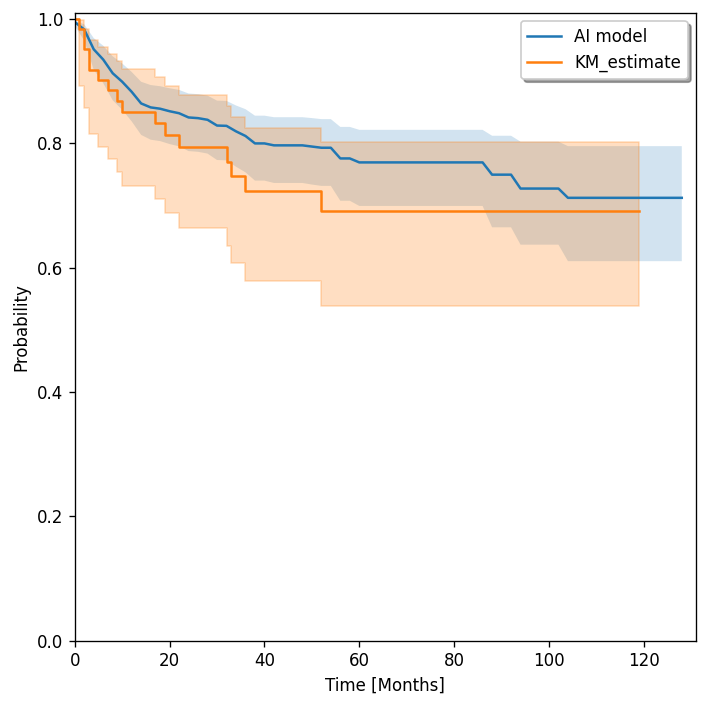

In [ ]:
from lifelines.statistics import logrank_test
fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)

# fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
# plt.figure(figsize=(6, 6), dpi=120)



line1, = ax.plot(mean.columns, mean.mean(), label="AI model")
line2 = ax.fill_between(mean.columns, lower_ci.mean(), upper_ci.mean(), alpha=0.2)

line3 = kmf.plot_survival_function()


# results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)


ax.legend(shadow=True)


plt.xlabel('Time [Months]')
plt.ylabel('Probability')
plt.xlim([-0.01, 131])
plt.ylim([0.0, 1.01])
plt.tight_layout()

In [ ]:
dist_calibration_score(y_test, mean, returns="all")

{'statistic': 0.9446263135911378,
 'pval': 0.9995548675871838,
 'max_deviation': 0.18595996039633,
 'histogram': bin
 (-0.001, 0.1]    5.585668
 (0.1, 0.2]       5.585668
 (0.2, 0.3]       5.585668
 (0.3, 0.4]       5.585668
 (0.4, 0.5]       5.585668
 (0.5, 0.6]       7.471548
 (0.6, 0.7]       6.951691
 (0.7, 0.8]       6.264223
 (0.8, 0.9]       7.122808
 (0.9, 1.0]       7.261392
 dtype: float64}

In [ ]:
predicted_surv = mean

In [ ]:
mean.mean()

0      0.994875
2      0.982828
4      0.951001
6      0.934520
8      0.912499
         ...   
120    0.712156
122    0.712156
124    0.712156
126    0.712156
128    0.712156
Length: 65, dtype: float64

In [ ]:
from bisect import bisect_right
def _match_times_to_windows(times, windows):
    matches = np.array([bisect_right(windows, e) for e in times])
    matches = np.clip(matches, 0, len(windows) - 1)
    return windows[matches]

In [ ]:
 n_bins=10

In [ ]:
events, times = convert_y(y_test)
events = events.astype(bool)

# mapping event and censoring times to survival windows
event_time_windows = _match_times_to_windows(times, mean.columns)
survival_at_ti = np.array(
        [mean.iloc[i][event_time_windows[i]] for i in range(len(mean))]
)

survival_at_ti = np.clip(survival_at_ti, 1e-6, None)

    # creating data frame to calculate uncensored and censored counts
scoring_df = pd.DataFrame(
        {
            "survival_at_ti": survival_at_ti,
            "t": times,
            "e": events,
            "bin": pd.cut(survival_at_ti, 10, include_lowest=True),
            "cens_spill_term": 1 / (n_bins * survival_at_ti),
        }
    )

    # computing uncensored counts:
    # sum the number of events per bin
count_uncens = scoring_df.query("e == True").groupby("bin").size()

    # computing censored counts at bin of censoring
    # formula (A) as by page 49 of
    # https://arxiv.org/pdf/1811.11347.pdf
count_cens = (
        scoring_df.query("e == False")
        .groupby("bin")
        .apply(lambda x: (1 - np.clip(x.name.left, 0, 1) / x["survival_at_ti"]).sum())
    )

In [ ]:
scoring_df[scoring_df['e']==True]

,survival_at_ti,t,e,bin,cens_spill_term
0,0.959184,9.0,True,"(0.953, 1.0]",0.104255
1,0.761950,3.0,True,"(0.72, 0.767]",0.131242
10,0.913224,19.0,True,"(0.907, 0.953]",0.109502
15,0.836735,5.0,True,"(0.813, 0.86]",0.119512
18,0.878182,2.0,True,"(0.86, 0.907]",0.113872
22,0.629300,32.0,True,"(0.627, 0.673]",0.158907
34,0.854708,17.0,True,"(0.813, 0.86]",0.116999
36,0.980000,1.0,True,"(0.953, 1.0]",0.102041
40,0.557393,22.0,True,"(0.532, 0.58]",0.179407
41,0.668586,36.0,True,"(0.627, 0.673]",0.149569


In [ ]:
X.columns

Index(['Age', 'Female', 'BMI', 'Pre_GFR', 'Location_Pelvis',
       'Location_multiple', 'HUN', 'path_T', 'Path_N', 'Path_Grade',
       'Path_CIS'],
      dtype='object')

In [ ]:
scoring_df

,survival_at_ti,t,e,bin,cens_spill_term
0,0.959184,9.0,True,"(0.953, 1.0]",0.104255
1,0.761950,3.0,True,"(0.72, 0.767]",0.131242
2,0.819770,102.0,False,"(0.813, 0.86]",0.121985
3,0.921974,31.0,False,"(0.907, 0.953]",0.108463
4,0.980000,23.0,False,"(0.953, 1.0]",0.102041
...,...,...,...,...,...
58,0.833334,52.0,False,"(0.813, 0.86]",0.120000
59,0.913760,31.0,False,"(0.907, 0.953]",0.109438
60,0.937868,71.0,False,"(0.907, 0.953]",0.106625
61,0.958296,1.0,False,"(0.953, 1.0]",0.104352


In [ ]:
risks = 1- mean

In [ ]:

mean_1 = xgbse_model.predict(X_train, return_ci=False)
print(f"C-index: {concordance_index(y_train, mean_1)}")

C-index: 0.8400170043928015


In [ ]:
mean_1 = xgbse_model.predict(X_valid, return_ci=False)
print(f"C-index: {concordance_index(y_valid, mean_1)}")

C-index: 0.8441558441558441


In [ ]:
xgbse_model

XGBSEKaplanNeighbors(n_neighbors=50,
                     xgb_params={'aft_loss_distribution': 'logistic',
                                 'aft_loss_distribution_scale': 0.7808394399897353,
                                 'alpha': 0.8131110903675679, 'booster': 'dart',
                                 'colsample_bylevel': 0.746946686317651,
                                 'colsample_bynode': 0.8692686156134454,
                                 'colsample_bytree': 0.9802156642973114,
                                 'eval_metric': 'aft-nloglik',
                                 'lambda': 0.869615180746642,
                                 'learning_rate': 0.14476854612914417,
                                 'max_depth': 12,
                                 'min_child_weight': 3.466138205198647,
                                 'objective': 'survival:aft',
                                 'scale_pos_weight': 2.9375,
                                 'tree_method': 'hist', 'verbosity':

In [ ]:
import pickle

In [ ]:
# from joblib import Parallel, delayed
# import joblib
  
  
# # Save the model as a pickle in a file
# joblib.dump(xgbse_model, savepath+'UTUC_surv.pkl')

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
from traitlets.config import validate
# Re-run training with the best hyperparameter combination
print('Re-running the best trial... params = {}'.format(params))

xgb_model = xgb.train(
            params,
            xgb_train,
            # maximize=True,
            evals= [(xgb_valid, 'eval')],
            num_boost_round=1000,
            early_stopping_rounds=100,
            verbose_eval=10
)

Re-running the best trial... params = {'verbosity': 0, 'objective': 'survival:aft', 'eval_metric': 'aft-nloglik', 'tree_method': 'hist', 'booster': 'dart', 'scale_pos_weight': 2.9375, 'learning_rate': 0.14476854612914417, 'aft_loss_distribution': 'logistic', 'aft_loss_distribution_scale': 0.7808394399897353, 'max_depth': 12, 'lambda': 0.869615180746642, 'alpha': 0.8131110903675679, 'min_child_weight': 3.466138205198647, 'colsample_bynode': 0.8692686156134454, 'colsample_bytree': 0.9802156642973114, 'colsample_bylevel': 0.746946686317651}
[0]	eval-aft-nloglik:2.14113
[10]	eval-aft-nloglik:1.81832
[20]	eval-aft-nloglik:1.77587
[30]	eval-aft-nloglik:1.73796
[40]	eval-aft-nloglik:1.73131
[50]	eval-aft-nloglik:1.72548
[60]	eval-aft-nloglik:1.73130
[70]	eval-aft-nloglik:1.72509
[80]	eval-aft-nloglik:1.73802
[90]	eval-aft-nloglik:1.74268
[100]	eval-aft-nloglik:1.74447
[110]	eval-aft-nloglik:1.74910
[120]	eval-aft-nloglik:1.75755
[130]	eval-aft-nloglik:1.76254
[140]	eval-aft-nloglik:1.76327
[1

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X.columns, class_names='PRG', discretize_continuous=True)


TypeError: ignored

In [ ]:
from lifelines.utils import concordance_index as cindex

preds = xgb_model.predict(xgb_test).astype(float)
T = meta['PFS'][test_idx]
E = meta['Prg'][test_idx]
cind = cindex(T, preds , E)
print(f"C-index: {cind:.3f}")
print(f"Average survival time: {preds.mean():.0f} Months")

In [ ]:
preds_2 = xgb_model.predict(xgb_train).astype(float)
T_2 = meta['PFS'][train_idx]
E_2 = meta['Prg'][train_idx]
cind_2 = cindex(T_2, preds_2, E_2)

preds_3 = xgb_model.predict(xgb_valid).astype(float)
T_3 = meta['PFS'][valid_idx]
E_3 = meta['Prg'][valid_idx]
cind_3 = cindex(T_3, preds_3, E_3)

print (cind_2, cind_3)

In [ ]:
X.columns

In [ ]:
from xgboost import plot_importance

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

axes = [ax for row_axes in axes for ax in row_axes]

plot_importance(xgb_model,importance_type='total_gain', title='Total Gain', grid=False, ax=axes[0], color='red',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model,importance_type='total_cover', title='Total Cover', grid=False, ax=axes[1] ,color='orange',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model,importance_type='gain', title='Gain', grid=False, ax=axes[2], color='green',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model,importance_type='cover', title='Cover', grid=False, ax=axes[3], color='blue',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model,importance_type='weight', title='Weight', grid=False, ax=axes[4], color='purple',show_values=False).set_yticklabels(X.columns)

plt.tight_layout()
plt
plt.show


In [ ]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X.columns, class_names=['Progression'], verbose=True, mode='regression')

In [ ]:
X

In [ ]:
ext_1 = pd.read_csv(os.path.join(datapath+'/'+'UTUC_deep_SNU.csv'))

In [ ]:
ext_1['Pre_GFR'].replace({' ':np.nan},inplace=True) 
ext_1['Pre_GFR'] = ext_1['Pre_GFR'].astype(float)

ext_1['Path_N'].replace({' ':np.nan},inplace=True) 
ext_1['Path_N'].replace({'N2':1},inplace=True) 
ext_1['Path_N'] = ext_1['Path_N'].astype(float)

ext_1['Path_Grade'].replace({' ':np.nan},inplace=True) 
ext_1['Path_Grade'] = ext_1['Path_Grade'].astype(float)

ext_1['Path_CIS'].replace({' ':np.nan},inplace=True) 
ext_1['Path_CIS'] = ext_1['Path_CIS'].astype(float)

ext_1['Prg'].replace({' ':np.nan},inplace=True) 
ext_1['Prg'] = ext_1['Prg'].astype(float)

ext_1['PFS'].replace({' ':np.nan},inplace=True) 
ext_1['PFS'] = ext_1['PFS'].astype(float)

ext_1['OS'].replace({' ':np.nan},inplace=True) 
ext_1['OS'] = ext_1['OS'].astype(float)

In [ ]:
ext_1 = ext_1.dropna(subset=['Prg','PFS','OS', 'Surv'])

In [ ]:
X_snu = ext_1[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
       'Path_Grade', 'Path_CIS']]
y_snu = ext_1[['Prg', 'PFS','OS', 'Surv']]

In [ ]:
X_snu.describe()

In [ ]:
y_snu_anal = convert_to_structured(y_snu['PFS'], y_snu['Prg'])

In [ ]:
# %%time

mean_snu, upper_ci_snu, lower_ci_snu = xgbse_model.predict(X_snu, return_ci=True)


# # predicting
# mean, upper_ci, lower_ci = bootstrap_estimator.predict(X_test, return_ci=True)

# print metrics
print(f"C-index: {concordance_index(y_snu_anal, mean_snu)}")
print(f"Avg. Brier Score: {approx_brier_score(y_snu_anal, mean_snu)}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal, mean_snu)> 0.05}")


In [ ]:

dist_calibration_score(y_snu_anal, mean_snu)

In [ ]:
tt = ext_1['PFS'].max()
print(tt)

In [ ]:
mean_snu = mean_snu.loc[:,0:tt]
upper_ci_snu = upper_ci_snu.loc[:,0:tt]
lower_ci_snu = lower_ci_snu.loc[:,0:tt] 

In [ ]:
E_snu, T_snu  = convert_y(y_snu_anal)

In [ ]:
from lifelines import KaplanMeierFitter
kmf_2 = KaplanMeierFitter()

kmf_2.fit(T_snu, E_snu)



In [ ]:
from lifelines.statistics import logrank_test
fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)

# fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
# plt.figure(figsize=(6, 6), dpi=120)



line1, = ax.plot(mean_snu.columns, mean_snu.mean(), label="AI model_external vaild")
line2 = ax.fill_between(mean_snu.columns, lower_ci_snu.mean(), upper_ci_snu.mean(), alpha=0.2)

line3 = kmf_2.plot_survival_function(label='SNU')


# results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)


ax.legend(shadow=True)


plt.xlabel('Time [Months]')
plt.ylabel('Probability')
plt.xlim([-0.01, tt])
plt.ylim([0.0, 1.01])
plt.tight_layout()

In [ ]:
y_snu[y_snu['Prg']==1]

In [ ]:
y_snu

In [ ]:
X_snu.iloc[13]

In [ ]:
mean_snu.iloc[13]

0     1.000000
2     1.000000
4     1.000000
6     1.000000
8     1.000000
10    1.000000
12    1.000000
14    0.979167
16    0.979167
18    0.979167
20    0.979167
22    0.979167
24    0.979167
26    0.979167
28    0.979167
30    0.979167
32    0.979167
Name: 13, dtype: float64